In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df["Region_Code"]=[0]*len(df)
for i in range(123,len(df)):
    df.loc[i,"Region_Code"]=1
df=df.drop(123).reset_index(drop=True)
df=df.drop(122).reset_index(drop=True)
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region_Code
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [3]:
mode_value=df["Classes  "].mode()
df["Classes  "].fillna(mode_value[0],inplace=True)
df[df.isnull().any(axis=1)]


C:\Users\Hp\AppData\Local\Temp\ipykernel_15544\4063790464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Classes  "].fillna(mode_value[0],inplace=True)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region_Code


In [4]:
df.columns=df.columns.str.strip()
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)
df.head()
#sns.pairplot(df[['Temperature','RH','Ws']],kind='scatter')
#plt.show()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region_Code
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df[['day','month','year']]=df[['day','month','year']].astype(int)
df.head()
df=df.drop(165).reset_index(drop=True)
df.head()
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
df['Classes']=df['Classes'].astype(str)
df['Classes']=df['Classes'].str.strip()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region_Code  243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region_Code
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


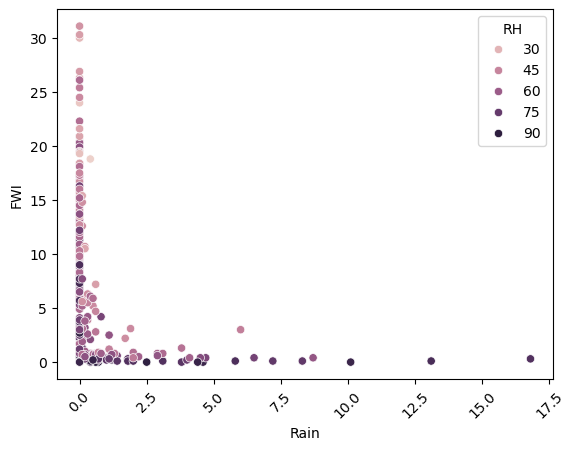

In [6]:
sns.scatterplot(data=df,x='Rain',y='FWI',hue='RH')
plt.xticks(rotation=45)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Classes_Coded']=encoder.fit_transform(df['Classes'])
df=df.drop(columns=['Classes'],axis=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Code,Classes_Coded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            243 non-null    int64  
 1   month          243 non-null    int64  
 2   year           243 non-null    int64  
 3   Temperature    243 non-null    int64  
 4   RH             243 non-null    int64  
 5   Ws             243 non-null    int64  
 6   Rain           243 non-null    float64
 7   FFMC           243 non-null    float64
 8   DMC            243 non-null    float64
 9   DC             243 non-null    float64
 10  ISI            243 non-null    float64
 11  BUI            243 non-null    float64
 12  FWI            243 non-null    float64
 13  Region_Code    243 non-null    int64  
 14  Classes_Coded  243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [9]:
df.to_csv("Algerian_Forest_Project.csv",index=False)

<Axes: ylabel='count'>

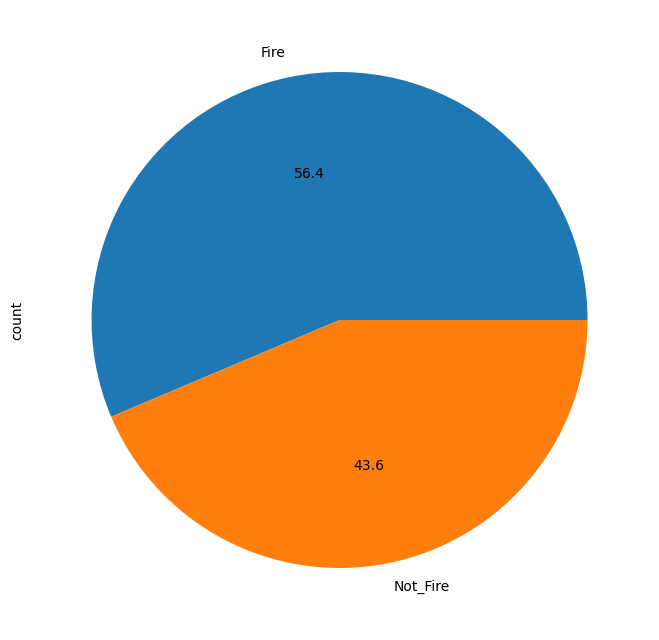

In [10]:
df['Classes_Coded'].value_counts().plot.pie(normalize=True,autopct="%1.1f",labels=['Fire','Not_Fire'],figsize=(8,12))

<Axes: >

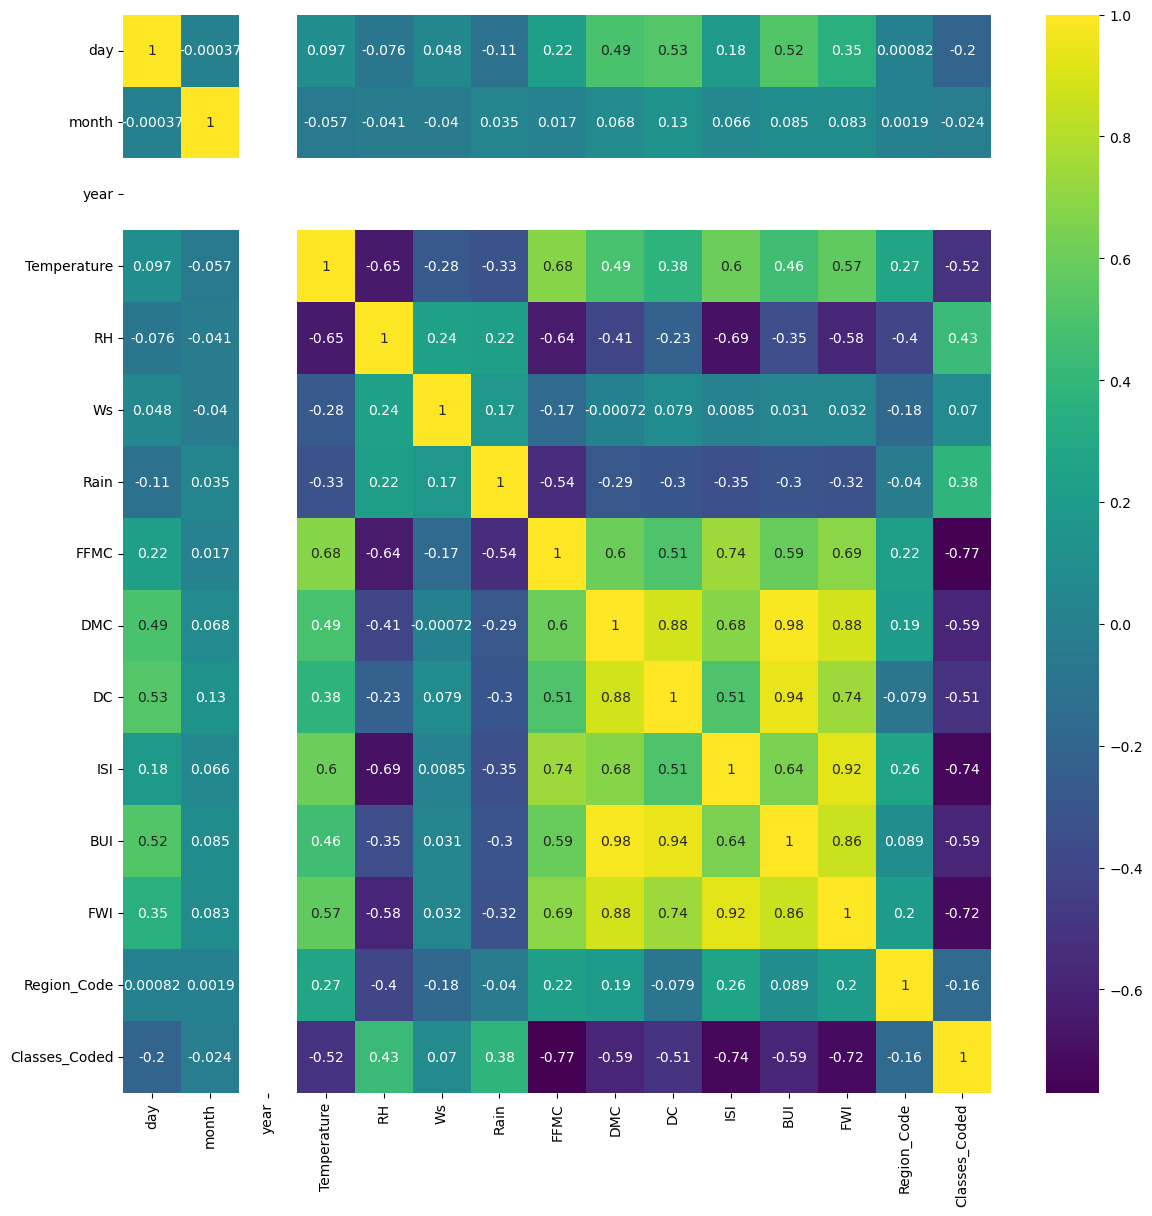

In [11]:
plt.figure(figsize=(14,14))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)

Text(0.5, 1.0, 'FWI OUTLIERS INFORMATION')

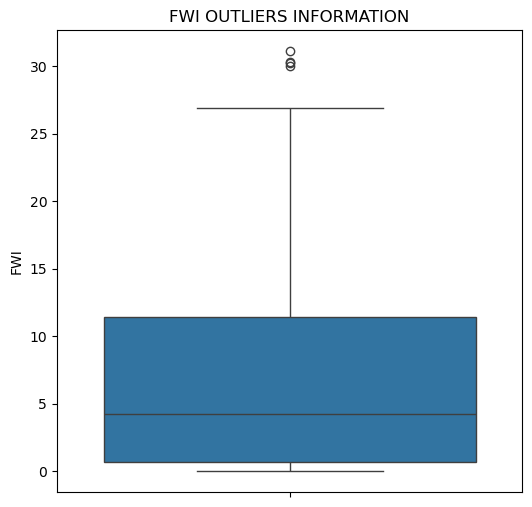

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y='FWI')
plt.title("FWI OUTLIERS INFORMATION")

<Axes: xlabel='month', ylabel='count'>

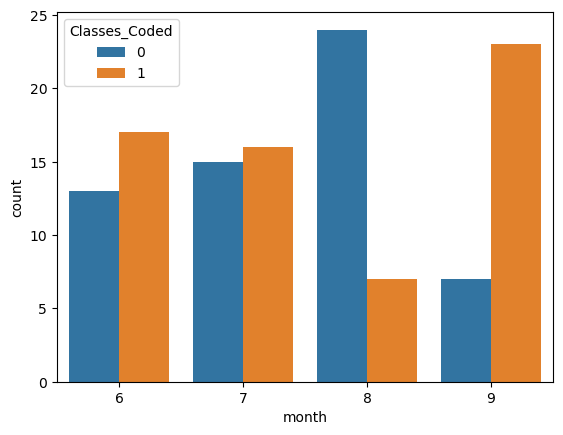

In [13]:
df_temp=df[df["Region_Code"]==0]
sns.countplot(data=df_temp,x="month",hue='Classes_Coded')